In [1]:
%matplotlib inline
import numpy as np
from scipy.stats import norm
from sklearn.metrics import r2_score, mean_squared_error

import pylab as plt
from matplotlib.mlab import bivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# Normal Distribution

사람의 키, 측정치의 오류률, 혈압, 시험성적등등 많은 데이터의 유형이 gassian distribution(normal distribution)을 따릅니다. <br>
평균값과 분산값만 알고 있다면 central theorem을 통해 분포도를 알 수 있습니다.<br>
> 데이터가 정규분포를 따를때.. <br>
> 68%는 1 std안에 존재하고, 95%는 2 std안에 존재하며, 99.7%는 3 std안에 존재합니다.

Gaussian distribution의 공식은 다음과 같으며, probability density function으로도 불립니다.<br>
PDF는 어떤 구간[a, b] 안에 확률 변수 X가 포함될 확률을 나타냅니다.

$$ y = \frac{1}{\sqrt{2\pi \sigma^2}} exp \left(-\frac{(x-\mu)^2}{2 \sigma^2} \right) $$

### Scipy Normal Distribution

**scipy.stats.norm.pdf(x, loc=0, scale=1)** 을 사용해서 Standardard Normal Distribution을 사용할수 있습니다.<br>
만약 위의 일반정규분포공식을 사용하고자 한다면 **scipy.stats.norm.pdf(x, loc=np.mean(x), scale=np.sqrt(np.std(x)))** 이렇게 사용해야 합니다.

Mean: 10.0 STD : 2.14932341883
MSE General  Normal Distribution: 1.20888447813e-30
MSE Standard Normal Distribution: 0.0


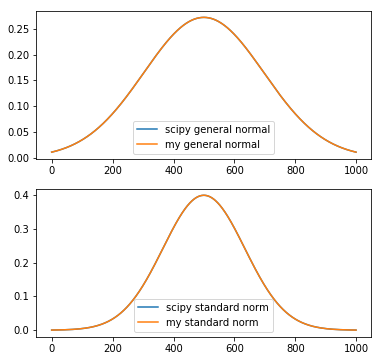

In [2]:
def general_norm_pdf(x):
    std = np.std(x)
    mean = np.mean(x)
    r = np.exp(-(x-mean)**2/(2*std))/np.sqrt(2 * np.pi * std)
    return r

def standard_norm_pdf(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

def example_normal_distributions(mean=10):
    x = np.linspace(norm.ppf(0.0001), norm.ppf(0.9999), 1000) + mean
    SCALE = np.std(x)
    
    general_norm_data1 = norm.pdf(x, loc=mean, scale=np.sqrt(np.std(x)))
    general_norm_data2 = general_norm_pdf(x)

    std_norm_data1 = norm.pdf(x, loc=mean)
    std_norm_data2 = standard_norm_pdf((x-mean))

    fig, plots = plt.subplots(2)
    fig.set_figheight(6)
    plots[0].plot(general_norm_data1, label='scipy general normal')
    plots[0].plot(general_norm_data2, label='my general normal')
    plots[1].plot(std_norm_data1, label='scipy standard norm')
    plots[1].plot(std_norm_data2, label='my standard norm')
    plots[0].legend()
    plots[1].legend()
    
    print('Mean:', np.mean(x), 'STD :', np.std(x))
    print('MSE General  Normal Distribution:', mean_squared_error(general_norm_data1, general_norm_data2))
    print('MSE Standard Normal Distribution:', mean_squared_error(std_norm_data1, std_norm_data2))
example_normal_distributions()

### Sampling Distribution of the Mean

어떤 분포이든지간에 표본의 평균(sample mean)은 normal distribution을 따릅니다.<br>
예를 들어서 2000명의 학생들이 종이 쪽이에 0에서 100사이의 숫자를 적은뒤 상자안에 넣습니다.<br>
수학선생님이 랜덤으로 30개의 종이쪽지를 꺼내서 평균을 냅니다. 만약 선생님이 이 작업을 여러번 할 경우<br>
표본의 평균은 확률분포는 정규분포를 갖게 됩니다.<br>
아래는 코드로 설명한 것입니다.

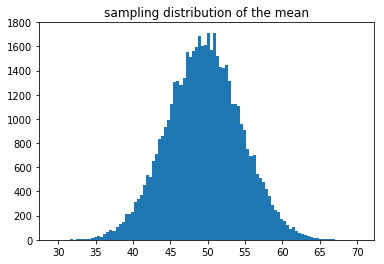

In [3]:
def test_sample_mean_is_normal_distribution(n=1000):
    X = np.random.randint(0, 100, size=2000)
    samples = np.zeros(n, dtype='float32')
    for i in range(n):
        idx = np.random.randint(0, 100, size=30)
        samples[i] = X[idx].mean()
    return samples
    
sample_means = test_sample_mean_is_normal_distribution(n=50000)
plt.hist(sample_means, bins=100)
plt.title('sampling distribution of the mean')
print()

# Multivariate Normal Distribution

한국어로 다변수 또는 다변량 정규분포라고 하며, 다차원의 공간에 확장한 분포입니다.<br>
Probability density function은 다음과 같이 정의 됩니다.


$$ p(x\ |\ \mu, \Sigma) = \frac{1}{\left( 2\pi \right)^{n/2} \left| \Sigma \right|^{1/2}} 
exp \left(-\frac{1}{2} (\mathbf{x} - \mu)^T \Sigma^{-1} (\mathbf{x} - \mu) \right) $$


아래의 그림은 multivariate normal distribution의 예입니다.

In [85]:
def multivariate_normal_dist(x, y):
    n = x.shape[0]
    
    x_vec = np.concatenate([x, y], axis=1)
    cov = np.cov(x_vec[:, 0], x_vec[:, 1])[0]
    mean = np.mean(x_vec.T)
    
    
    a = (2*np.pi)**(x_vec.shape[1]/2) * np.abs(cov)**(1/2)
    b = np.exp(-1/2*(x_vec-mean) * cov**-1 * (x_vec - mean))
    return a*b

x = np.linspace(-3, 3, 1000).reshape(-1, 1)
y = np.linspace(0, 5, 1000).reshape(-1, 1)

multivariate_normal_dist(x, y)

array([[ 0.54187822,  7.28603086],
       [ 0.54649126,  7.30419576],
       [ 0.55113696,  7.32233279],
       ..., 
       [ 6.59794372,  0.61164636],
       [ 6.57505549,  0.60709437],
       [ 6.55216812,  0.60257023]])

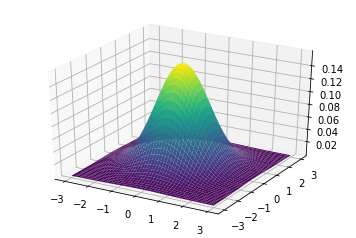

In [4]:
def example_multivariate_normal_distribution():
    x = np.linspace(-3, 3, 1000)
    y = np.linspace(-3, 3, 1000)
    x, y = np.meshgrid(x, y)
    z = bivariate_normal(x, y)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(x, y, z, cmap='viridis')
    
example_multivariate_normal_distribution()

### Scipy Multivariate Normal Distribution

Mean은 N-dimensional space의 좌표이며 표본데이터가 가장 많이 나타낼 위치입니다. <br>
따라서 일반적인 univariate normal distribution의 peak 부분의 위치와 동일하다고 볼수 있습니다. 

Covariance는 2개의 분포가 서로 유사하게 움직이는지 판단하는데 사용됩니다.<br>
예를 들어 positive covariance는 서로 동일하게 움직인다는 뜻이며 (증가하거나 감소하거나) <br>
Negative covariance의 경우는 서로 반대방향으로 움직이고 있다는 뜻입니다. 

Scipy사용시 full covariance matrix를 사용하지 않고 approximation을 사용합니다.

* Spherical covariance
* Diagonal covariance

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: covariance is not positive-semidefinite.


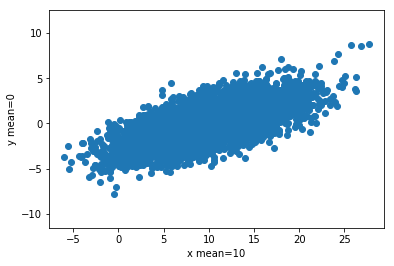

In [13]:
def example_scipy_multivariate_norm():
    mean = [10, 0]
    cov = [[25, 7], [0, -2]]
    multi_norms = np.random.multivariate_normal(mean, cov, 5000)
    x = multi_norms[:, 0]
    y = multi_norms[:, 1]
    plt.scatter(x, y)
    plt.xlabel('x mean=10')
    plt.ylabel('y mean=0')
    plt.axis('equal')

example_scipy_multivariate_norm()

# Intro

하지만 분포도가 아래와 같이 2개의 multimodal distributions으로 이루어져있다면 어떻게 해야 할까요?<br>
결론적으로.. 추가적인 gaussian distribution을 추가해주면 됩니다! <br>
Gaussian Mixture Model은 이런 개념에서 출발한다고 보면 됩니다.

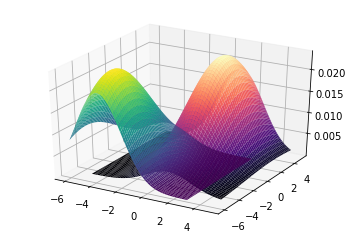

In [7]:
sigmax = np.sqrt(3)
sigmay = np.sqrt(15)
x1 = np.linspace(-5, 5, 100)
y1 = np.linspace(-5, 5, 100)
x1, y1 = np.meshgrid(x1, y1)

x2 = np.linspace(-6, 3, 100)
y2 = np.linspace(-6, 3, 100)
x2, y2 = np.meshgrid(x2, y2)
z1 = bivariate_normal(x1, y1, sigmax=sigmax, sigmay=sigmay, mux=1, muy=2.2)
z2 = bivariate_normal(x2, y2+4, sigmax=sigmax, sigmay=sigmay, mux=-3.7, muy=0.1)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x1, y1, z1, cmap='magma', linewidth=0)
ax.plot_surface(x2, y2, z2, cmap='viridis', linewidth=0)

# Model

Gaussian mixture model (GMM)은 univariate normal distribution과 multivariate normal distribution으로 나뉩니다.<br>
Univariate normal distribution의 경우는 일반적인 normal distribution의 probability density function을 가르킵니다.

## One Dimensional Model (Univariate)

위에서 이야기 했듯이, gaussian을 추가하며, 일반적인 normal distribution의 probability density function과 공식이 동일합니다.<br>
weights $ w $ 값의 합은 1이 됩니다.

$$ \begin{align}
p(x) &= \sum^K_{i=1} w_i \mathcal{N}\left(x\ |\ \mu_i, \sigma_i\right)  \\
\mathcal{N}\left( x\ |\ \mu_i, \sigma_i \right) &= \frac{1}{\sqrt{2\pi \sigma^2_i}} 
exp\left(- \frac{(x - \mu_i)^2}{2 \sigma^2_i} \right) \\
\sum^K_{i=1} w_i &= 1
\end{align} $$

* $ K $ : K개의 components를 뜻하며, component는 gaussian distribution을 뜻함
* $ w $ : component weights
* $ \mu $ : 평균값
* $ \sigma $ : variance


## Multi-Dimensional Model (Multivariate)

[Edit this wiki Multivariate Normal Distribution](https://brilliant.org/wiki/multivariate-normal-distribution/) 을 참고합니다.


$$ \begin{align} 
p(\vec{x}) &= \sum^K_{i=1} w_i \mathcal{N} \left( \vec{x}\ |\ \vec{\mu}_i, \Sigma_i \right) \\
\mathcal{N}\left( \vec{x} \ |\ \vec{\mu}_i, \Sigma_i \right) &= 
\frac{1}{\sqrt{(2\pi)^K | \Sigma_i |}} exp \left( -\frac{1}{2} 
\left( \vec{x} - \vec{\mu}_i \right)^T \Sigma_i^{-1} \left( \vec{x} - \vec{\mu}_i \right) \right) \\
\sum^K_{i=1} w_i &= 1
\end{align} $$

* $ w $ : prior praobability
* $ \Sigma $ : covariance matrix of the Gaussian


# Expectation Maximization for Gaussian Mixture Models

GMM의 Expectation maximizationdms 2개의 단계로 이루어 집니다.<br>

첫번째로 Expectation $ E $

# References

* [Brilliant Gaussian Mixture Model](https://brilliant.org/wiki/gaussian-mixture-model/)
* [Quick introduction to gaussian mixture models with python](http://www.nehalemlabs.net/prototype/blog/2014/04/03/quick-introduction-to-gaussian-mixture-models-with-python/)
* [Siraj Raval](https://github.com/llSourcell/Gaussian_Mixture_Models/blob/master/intro_to_gmm_%26_em.ipynb)